# Tutorial 5: RFE on the best 400 features

---

### Introduction

Hello, this notebook will show how to use RFE to perform further feature selection, as we found that most features are very highly correlated, therfore we would need to remove those using the tool that we mentioned above. 

first, let us call the data

In [1]:
%store -r df_input_GD
%store -r y_GD
%store -r df_GD

In [2]:
y_GD = y_GD.map({'S': 1, 'B': 0})

---

calling some packages

In [3]:
# Python packages 
import pandas as pd # for importing data into data frame format
import seaborn as sns # For drawing useful graphs, such as bar graphs
import numpy as np
import matplotlib.pyplot as plt

---

<b><i> Data splitting </i></b> 

In [4]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split( df_input_GD, y_GD, test_size = 0.3, random_state=3, stratify=y_GD) # train and valid sets

In [5]:
print(Xtrain.shape)
print(Xtest.shape)

(382, 2074)
(165, 2074)


---

<b><i> get the best N features </i></b> 

In [6]:
%store -r featImp_GD

In [7]:
arrimp = np.array(featImp_GD).mean(0)
sorted_idx = arrimp.argsort()
print(sorted_idx[-10:])

[ 15 205 144 153  71 180 157  60  43  86]


In [8]:
cols_ordered = df_input_GD.columns[sorted_idx][-400:]
cols_ordered

Index([1018.719,  883.052, 1229.322,   989.18,  919.703, 2450.511, 1663.015,
         975.41,  1551.55, 2002.039,
       ...
        837.687,  892.475,  874.121,  876.781,  853.123,   884.86,  877.969,
        850.046,  845.334,  857.355],
      dtype='object', length=400)

---

In [10]:
Xtrain[cols_ordered]

,1018.719,883.052,1229.322,989.180,919.703,2450.511,1663.015,975.410,1551.550,2002.039,...,837.687,892.475,874.121,876.781,853.123,884.860,877.969,850.046,845.334,857.355
228,-1.087990,-1.030926,-1.148293,-1.113318,-1.048227,-0.685276,-1.092314,-1.117591,-0.997408,-0.649178,...,-1.040947,-1.035275,-1.030146,-1.033481,-1.032521,-1.034466,-1.029368,-1.031805,-1.039755,-1.031936
474,1.300795,1.238410,1.339526,1.304189,1.260066,0.935879,1.344952,1.303722,1.300464,1.024498,...,1.210396,1.244742,1.230255,1.231594,1.220015,1.233132,1.230056,1.216652,1.215678,1.224416
273,1.150353,1.146772,1.144389,1.152049,1.143321,0.655422,1.082083,1.157107,1.084859,0.807275,...,1.127660,1.141946,1.144145,1.144791,1.137959,1.144632,1.144275,1.139449,1.133384,1.144581
285,0.908300,1.006635,0.788019,0.879218,0.985668,0.156375,0.599963,0.877727,0.541269,0.227356,...,1.017840,1.000981,1.012044,1.010621,1.020728,1.009804,1.008720,1.020247,1.022598,1.018547
20,-0.762880,-0.789648,-0.669492,-0.734424,-0.783509,0.021936,-0.357177,-0.721339,-0.196387,0.022215,...,-0.797608,-0.788356,-0.792682,-0.789674,-0.799611,-0.786075,-0.790533,-0.802299,-0.794386,-0.800824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,1.267932,1.262031,1.286273,1.269223,1.266144,1.333936,1.362730,1.273116,1.383025,1.328693,...,1.240678,1.262327,1.258593,1.259826,1.246070,1.264388,1.259422,1.246331,1.244710,1.247542
71,-0.988367,-0.964915,-0.996997,-0.994270,-0.962605,0.076077,-0.790307,-0.989817,-0.598052,0.041415,...,-0.981073,-0.963380,-0.965990,-0.963353,-0.978024,-0.959486,-0.964945,-0.978210,-0.975422,-0.977062
287,1.158114,1.096258,1.181571,1.176683,1.108657,0.086486,0.903432,1.182322,0.697978,0.130295,...,1.088064,1.103508,1.098137,1.097991,1.090781,1.102332,1.098439,1.096154,1.096031,1.091843
66,-1.341772,-1.283949,-1.473712,-1.379037,-1.292361,-1.654704,-1.660482,-1.387514,-1.700697,-1.668134,...,-1.292153,-1.282100,-1.279279,-1.279909,-1.284921,-1.277541,-1.281256,-1.285772,-1.282308,-1.285889


### RFE

In [ ]:
# explore the number of selected features for RFE
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression

In [ ]:

def get_models():
    models = dict()
    for i in range(2, 51):
        rfe = RFE(estimator=LogisticRegression(solver = 'newton-cg'), n_features_to_select=i, verbose = 0)
        model = LogisticRegression(solver = 'newton-cg')
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=50, random_state=1)
    # cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
    
    scores = cross_val_score(model, X, y, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, Xtrain[cols_ordered[-400:]].values, Ytrain)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
    


>2 0.756 (0.080)
>3 0.757 (0.080)
>4 0.760 (0.079)
>5 0.756 (0.079)
>6 0.838 (0.076)
>7 0.839 (0.073)
>8 0.838 (0.074)
>9 0.839 (0.074)
>10 0.839 (0.073)
>11 0.840 (0.073)
>12 0.839 (0.072)
>13 0.841 (0.073)
>14 0.839 (0.072)
>15 0.841 (0.072)
>16 0.843 (0.073)
>17 0.844 (0.073)
>18 0.845 (0.074)
>19 0.845 (0.073)
>20 0.847 (0.073)
>21 0.846 (0.073)
>22 0.847 (0.073)
>23 0.846 (0.073)
>24 0.847 (0.073)
>25 0.845 (0.072)
>26 0.845 (0.071)
>27 0.846 (0.072)
>28 0.846 (0.073)
>29 0.845 (0.073)
>30 0.846 (0.073)
>31 0.845 (0.073)
>32 0.847 (0.071)
>33 0.847 (0.072)
>34 0.847 (0.071)
>35 0.847 (0.072)
>36 0.848 (0.072)
>37 0.848 (0.072)
>38 0.849 (0.072)


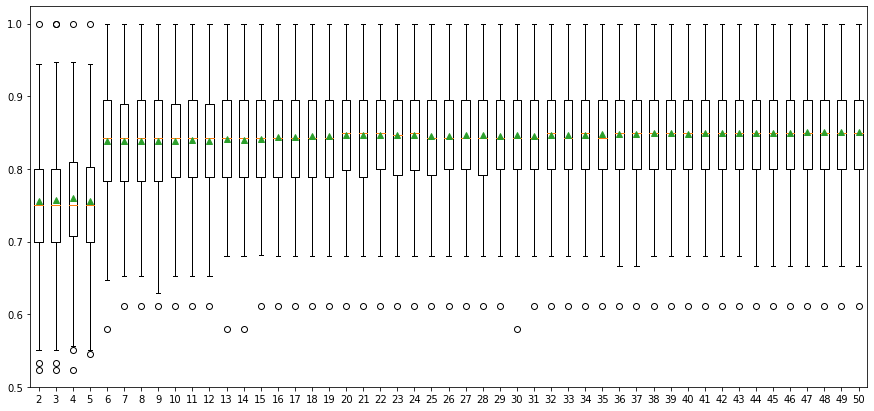

In [15]:
# plot model performance for comparison
plt.figure(figsize=(15, 7))
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()